In [23]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom

Drop Rates

In [14]:
'''
Drop rates acquired from crowd sourced osrs.wiki data  as of August 08, 2023
'''
ultor_vestige = 1/480
magus_vestige = 1/288
venator_vestige = 1/320
bellator_vestige = 1/205

r = 3

In [15]:
def nbinomial_pmf(r, p, y):
    '''
    Negative binomial probability function. r = 1 is the special case of the geometric probability function.
    Values of r larger than 3 may create numbers too large to be represented correctly using float64. 
    ---Parameters---
    r (int) number of successes 
    p (float) probability of a success of a bernoulli trial 
    y (int) y'th iid bernoulli trial
    ---Returns---
    Probability of getting the r'th success on exactly the y'th trial
    '''
    q = 1 - p
    if y < r:
        return 0
    else:
        return binom(y - 1, r - 1) * (p**r) * (q**(y-r))

In [16]:
def nbinomial_pmf_dict(r, p, n):
    '''
    Creates dictionary of negative binomial probability mass function values.
    ---Parameters---
    r (int) number of successes 
    p (float) probability of a success of a bernoulli trial 
    n (int) number of iid bernoulli trials to calculate
    ---Returns---
    Dictionary of pmf values
    '''
    pmf_dict = {}
    for y in range(1,n+1):
        pmf_dict[y]=nbinomial_pmf(r, p, y)
    return pmf_dict

In [17]:
def nbinomial_cdf_dict(pmf_dict):
    '''
    Creates dictionary of negative binomial cumulative distribution function values.
    ---Parameters---
    pmf_dict (dict) dictionary of pmf values to cumulate to create cdf
    ---Returns---
    Dictionary of cdf values
    '''
    cdf_dict={}
    cum_sum=0
    for y in pmf_dict.keys():
        cdf_dict[y]=cum_sum + pmf_dict[y]
        cum_sum = cdf_dict[y]
    return cdf_dict

In [36]:
vardorvis_nbinom=nbinomial_cdf_dict(nbinomial_pmf_dict(3,1/480,8000))
vardorvis_geom=nbinomial_cdf_dict(nbinomial_pmf_dict(1, 1/1440, 8000))

In [37]:
vardorvis_geom[1440]

0.6322483317190937

In [38]:
vardorvis_nbinom[1440]

0.5770435527431175

In [53]:
def create_df(nbinom_dict, geom_dict):
    df = pd.Series(data=nbinom_dict).to_frame(name='current drop mechanics').reset_index(names='kill count')
    df['old drop mechanics']=geom_dict.values()
    return df

In [54]:
a=create_df(vardorvis_nbinom, vardorvis_geom)

In [55]:
a.head()

,kill count,current drop mechanics,old drop mechanics
0,1,0.000000e+00,0.000694
1,2,0.000000e+00,0.001388
2,3,9.042245e-09,0.002082
3,4,3.611247e-08,0.002775
4,5,9.014012e-08,0.003467


In [57]:
fig = px.line(a, x='kill count', y=['current drop mechanics', 'old drop mechanics'], labels={'kill count': 'Kill Count', 'value': 'Probability'})
fig.update_layout(hovermode='x')
fig.show()

In [ ]:
def 

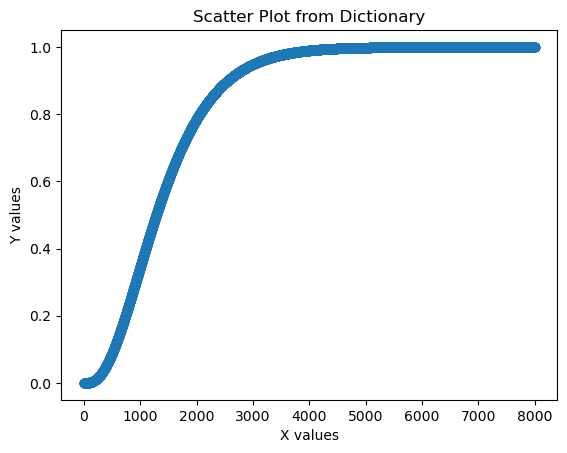

In [12]:
x_values = list(a.keys())
y_values = list(a.values())

# Create the scatter plot
plt.scatter(x_values, y_values)

# Customize the plot (optional)
plt.title("Scatter Plot from Dictionary")
plt.xlabel("X values")
plt.ylabel("Y values")

# Show the plot
plt.show()

In [ ]:
b=cdf(pmf_dict, 1)
x_values = list(a.keys())
y_values = list(a.values())

# Create the scatter plot
plt.scatter(x_values, y_values)

# Customize the plot (optional)
plt.title("Scatter Plot from Dictionary")
plt.xlabel("X values")
plt.ylabel("Y values")

# Show the plot
plt.show()

In [ ]:

# Extract 'x' and 'y' values from the dictionaries
x_values1 = list(a.keys())
y_values1 = list(a.values())

x_values2 = list(b.keys())
y_values2 = list(b.values())

# Create the scatter plot for the first data
plt.plot(x_values1, y_values1, label="Data 1", color="blue", marker=",")

# Create the scatter plot for the second data
plt.plot(x_values2, y_values2, label="Data 2", color="red", marker=",")

# Customize the plot (optional)
plt.title("Scatter Plot from Two Dictionaries")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()

# Show the plot
plt.show()